In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression

In [3]:
target = ['Stlhd']

In [4]:
file_path = Path('Resources/week_averages.csv')
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Week_Number,Stlhd,TempC
0,0,1,15.750000,4.894828
1,1,2,14.567164,4.606250
2,2,3,13.480620,4.032653
3,3,4,13.280303,3.773196
4,4,5,14.577236,3.724490


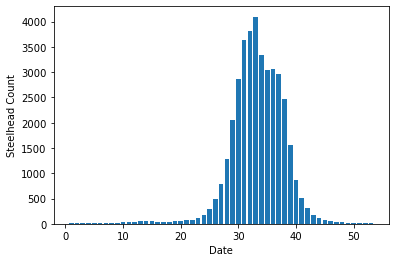

In [6]:
plt.bar(df.Week_Number, df.Stlhd)
plt.xlabel('Date')
plt.ylabel('Steelhead Count')
plt.show()

# Machine learning

In [6]:
# Creating features
X = df.drop('Stlhd', axis=1)
X = pd.get_dummies(X)

# Creating target
y = df.loc[:, target].copy()

In [7]:
X.describe()

,Chin,JChin,WStlhd,Sock,Coho,JCoho,Shad,Lmpry,BTrout,Chum,...,Date_9/9/2015,Date_9/9/2016,Date_9/9/2017,Date_9/9/2018,Date_9/9/2019,Date_9/9/2020,Date_9/9/2021,Chinook Run_Fa,Chinook Run_Sp,Chinook Run_Su
count,8648.000000,7298.000000,8837.000000,2972.000000,3940.000000,3337.000000,3813.000000,4042.000000,0.0,811.000000,...,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000
mean,2019.130897,337.948342,254.909358,1664.309219,726.984264,69.098592,24555.979019,210.471301,NaN,4.081381,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.336479,0.245355,0.191880
std,4214.734080,597.691099,533.930096,4175.868779,1415.404657,102.090039,53044.080605,370.423207,NaN,5.498667,...,0.009915,0.009915,0.009915,0.009915,0.009915,0.009915,0.009915,0.472528,0.430319,0.393799
min,-33.000000,-5.000000,-60.000000,-1.000000,-22.000000,-4.000000,1.000000,-258.000000,NaN,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.000000,33.000000,7.000000,7.000000,15.000000,7.000000,99.000000,9.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,589.500000,115.000000,23.000000,113.000000,173.000000,34.000000,1466.000000,73.000000,NaN,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.250000,354.000000,248.000000,1151.250000,836.250000,91.000000,23520.000000,261.000000,NaN,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,67521.000000,6458.000000,8557.000000,41573.000000,20494.000000,1130.000000,520664.000000,4124.000000,NaN,56.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Check the target values
y['Stlhd'].value_counts()

8.0       109
3.0       107
4.0       106
11.0      104
6.0       102
         ... 
708.0       1
431.0       1
1353.0      1
1444.0      1
244.0       1
Name: Stlhd, Length: 2716, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(Counter(y_train['Stlhd']))
print(Counter(y_test['Stlhd']))

Counter({8.0: 84, 2.0: 81, 4.0: 81, 11.0: 79, 9.0: 78, 3.0: 78, 21.0: 76, 24.0: 75, 6.0: 73, 1.0: 71, 7.0: 70, 10.0: 70, 5.0: 67, 17.0: 66, 13.0: 65, 19.0: 62, 14.0: 61, 30.0: 61, 27.0: 61, 25.0: 59, 16.0: 58, 15.0: 57, 32.0: 56, 36.0: 56, 22.0: 54, 31.0: 53, 12.0: 53, 34.0: 52, 26.0: 52, 43.0: 51, 38.0: 51, 18.0: 50, 29.0: 49, 20.0: 49, 37.0: 48, 23.0: 47, 28.0: 45, 35.0: 44, 45.0: 43, 44.0: 42, 33.0: 41, 47.0: 40, 58.0: 39, 40.0: 39, 49.0: 38, 39.0: 38, 48.0: 38, 50.0: 37, 53.0: 37, 42.0: 36, 46.0: 36, 70.0: 36, 59.0: 35, 60.0: 34, 56.0: 34, 41.0: 33, 61.0: 33, 52.0: 31, 55.0: 30, 54.0: 29, 81.0: 27, 65.0: 26, 77.0: 26, 88.0: 26, 67.0: 25, 74.0: 24, 57.0: 24, 69.0: 24, 63.0: 24, 78.0: 24, 71.0: 23, -1.0: 23, -2.0: 22, 86.0: 22, 73.0: 22, 80.0: 22, 90.0: 22, 51.0: 21, 72.0: 21, 66.0: 20, 76.0: 20, 68.0: 20, 75.0: 18, 62.0: 18, 64.0: 17, 102.0: 17, 96.0: 17, 99.0: 16, 95.0: 15, 98.0: 15, 108.0: 15, 85.0: 15, 91.0: 14, 107.0: 14, 94.0: 14, 124.0: 13, 100.0: 13, 162.0: 12, 84.0: 12, 126.